# Exploratory Data Analysis (EDA) - Mobile Sales Dataset

This notebook provides a comprehensive EDA of the Mobile Sales dataset. It follows best practices for data exploration, cleaning, visualization, and statistical hypothesis testing.

## Steps Covered:
1. Understand the Dataset
2. Data Collection and Loading
3. Data Cleaning
4. Descriptive Statistics
5. Univariate Analysis
6. Bivariate and Multivariate Analysis
7. Feature Engineering
8. Visualization
9. Hypothesis Testing
10. Document Insights


In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/Users/personal/Documents/Imarticus/Classroom/Python/EDA/Projects/Mobile Sales/mobile_sales_data.csv")

# Display first few records
df.head()


,Product,Brand,Product Code,Product Specification,Price,Inward Date,Dispatch Date,Quantity Sold,Customer Name,Customer Location,Region,Core Specification,Processor Specification,RAM,ROM,SSD
0,Mobile Phone,Motorola,88EB4558,Site candidate activity company there bit insi...,78570,2023-08-02,2023-08-03,6,William Hess,South Kelsey,Central,NaN,Snapdragon 7 Gen,12GB,128GB,NaN
1,Laptop,Oppo,416DFEEB,Beat put care fight affect address his.,44613,2023-10-03,2023-10-06,1,Larry Smith,North Lisa,South,Ryzen 5,Ryzen 5,8GB,512GB,256GB
2,Mobile Phone,Samsung,9F975B08,Energy special low seven place audience.,159826,2025-03-19,2025-03-20,5,Leah Copeland,South Todd,Central,NaN,MediaTek Dimensity,8GB,256GB,NaN
3,Laptop,Sony,73D2A7CC,Friend record hard contain minute we role sea ...,20911,2024-02-06,2024-03-27,1,Dan Kirby,New Jordanmouth,South,i7,i7,12GB,64GB,2TB
4,Laptop,Microsoft,CCE0B80D,Program recently feeling save tree hotel people.,69832,2023-08-10,2023-09-10,4,Dean Martin,Keithton,East,i7,i7,8GB,128GB,2TB


## Data Cleaning

In [5]:
# Check data info
df.info()

# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Drop columns with too many missing values (e.g., Product Specification if mostly empty)
threshold = len(df) * 0.5
df = df.dropna(thresh=threshold, axis=1)

# Fill missing RAM/ROM/SSD with mode or forward fill if applicable
for col in ['RAM', 'ROM', 'SSD']:
    df[col] = df[col].fillna(df[col].mode()[0])

# Drop duplicates
df = df.drop_duplicates()

# Convert dates to datetime
df['Inward Date'] = pd.to_datetime(df['Inward Date'])
df['Dispatch Date'] = pd.to_datetime(df['Dispatch Date'])

# Check final datatypes
df.dtypes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Product                  50000 non-null  object
 1   Brand                    50000 non-null  object
 2   Product Code             50000 non-null  object
 3   Product Specification    50000 non-null  object
 4   Price                    50000 non-null  int64 
 5   Inward Date              50000 non-null  object
 6   Dispatch Date            50000 non-null  object
 7   Quantity Sold            50000 non-null  int64 
 8   Customer Name            50000 non-null  object
 9   Customer Location        50000 non-null  object
 10  Region                   50000 non-null  object
 11  Core Specification       25017 non-null  object
 12  Processor Specification  50000 non-null  object
 13  RAM                      50000 non-null  object
 14  ROM                      50000 non-nul

Product                            object
Brand                              object
Product Code                       object
Product Specification              object
Price                               int64
Inward Date                datetime64[ns]
Dispatch Date              datetime64[ns]
Quantity Sold                       int64
Customer Name                      object
Customer Location                  object
Region                             object
Core Specification                 object
Processor Specification            object
RAM                                object
ROM                                object
SSD                                object
dtype: object

## Descriptive Statistics

In [7]:
# Summary statistics
df.describe(include='all')


,Product,Brand,Product Code,Product Specification,Price,Inward Date,Dispatch Date,Quantity Sold,Customer Name,Customer Location,Region,Core Specification,Processor Specification,RAM,ROM,SSD
count,50000,50000,50000,50000,50000.000000,50000,50000,50000.00000,50000,50000,50000,25017,50000,50000,50000,50000
unique,2,20,50000,50000,NaN,NaN,NaN,NaN,40013,25147,5,8,15,6,5,4
top,Laptop,Google,88EB4558,Site candidate activity company there bit insi...,NaN,NaN,NaN,NaN,Michael Williams,South Michael,West,i5,MediaTek Dimensity,4GB,256GB,256GB
freq,25017,2598,1,1,NaN,NaN,NaN,NaN,22,54,10288,3215,3640,8417,10127,31284
mean,NaN,NaN,NaN,NaN,102641.407080,2024-03-19 17:41:58.272000,2024-04-19 07:54:30.528000,5.51378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,5008.000000,2023-03-21 00:00:00,2023-03-23 00:00:00,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,53487.000000,2023-09-20 00:00:00,2023-10-20 00:00:00,3.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,103072.000000,2024-03-19 00:00:00,2024-04-18 00:00:00,6.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,151396.250000,2024-09-18 00:00:00,2024-10-19 00:00:00,8.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,199999.000000,2025-03-20 00:00:00,2025-05-18 00:00:00,10.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Univariate Analysis

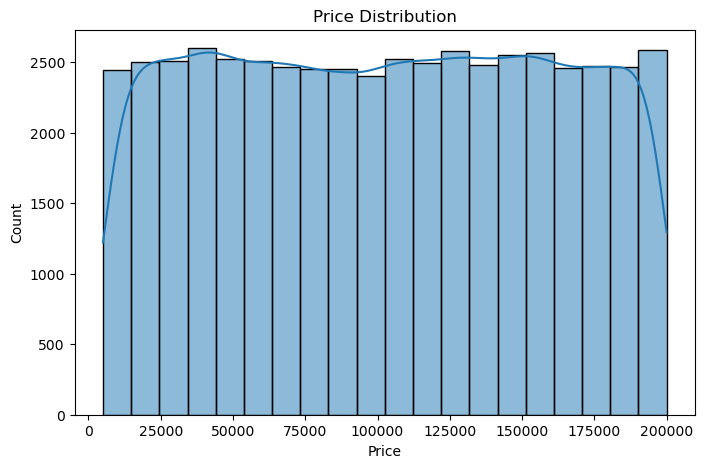

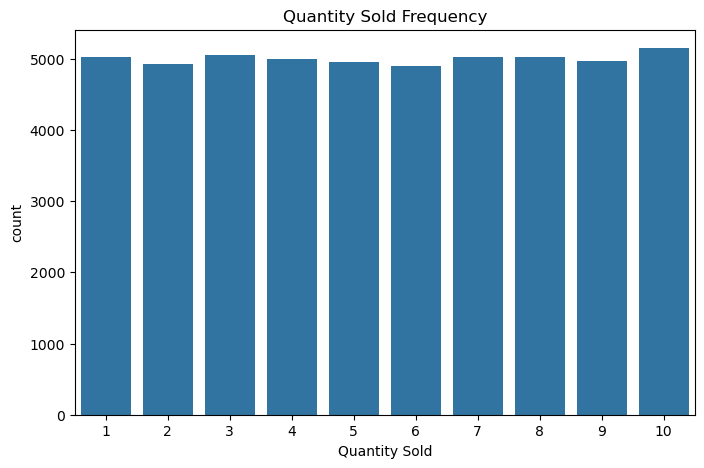

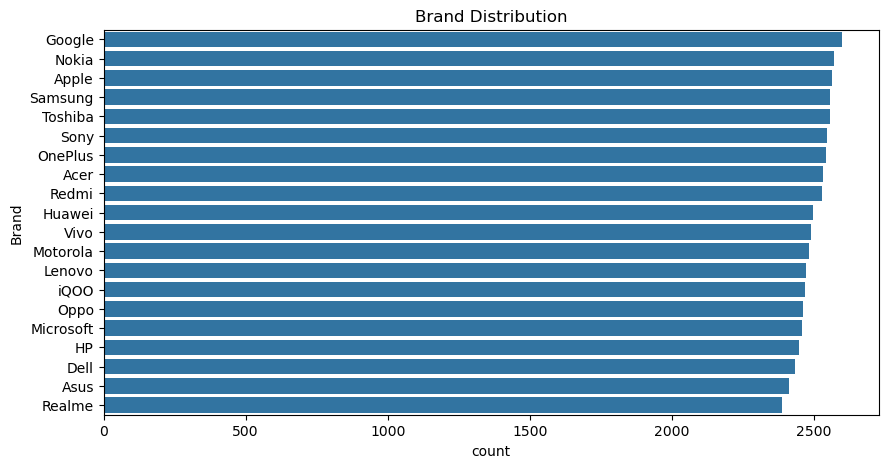

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot Price Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Price'], bins=20, kde=True)
plt.title('Price Distribution')
plt.show()

# Plot Quantity Sold
plt.figure(figsize=(8, 5))
sns.countplot(x='Quantity Sold', data=df)
plt.title('Quantity Sold Frequency')
plt.show()

# Brand distribution
plt.figure(figsize=(10, 5))
sns.countplot(y='Brand', data=df, order=df['Brand'].value_counts().index)
plt.title('Brand Distribution')
plt.show()


## Bivariate and Multivariate Analysis

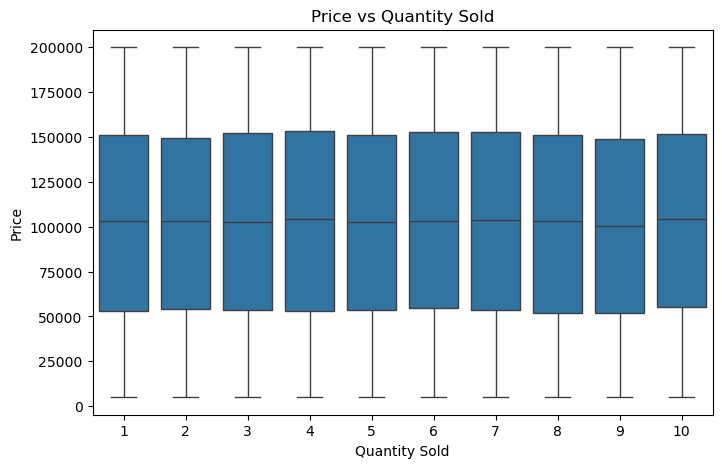

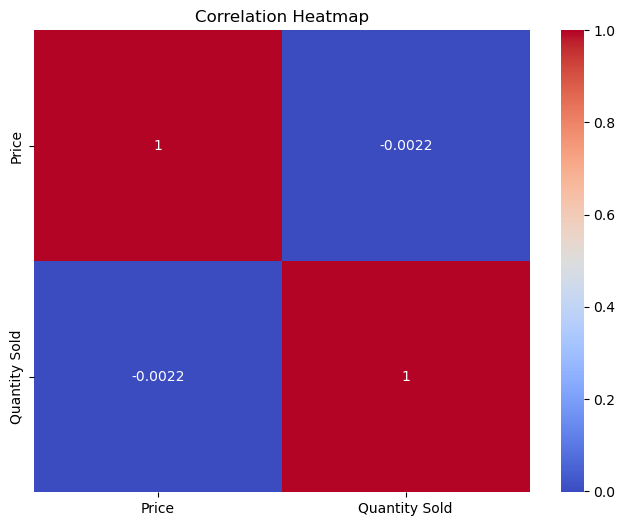

In [11]:
# Price vs Quantity Sold
plt.figure(figsize=(8, 5))
sns.boxplot(x='Quantity Sold', y='Price', data=df)
plt.title('Price vs Quantity Sold')
plt.show()

# Correlation heatmap for numeric variables
numeric_df = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


## Feature Engineering

In [13]:
# Create new feature: Days to Dispatch
df['Dispatch Delay (Days)'] = (df['Dispatch Date'] - df['Inward Date']).dt.days

# Encode categorical variables (example)
df_encoded = pd.get_dummies(df, columns=['Region', 'Brand'])

df_encoded.head()


,Product,Product Code,Product Specification,Price,Inward Date,Dispatch Date,Quantity Sold,Customer Name,Customer Location,Core Specification,...,Brand_Nokia,Brand_OnePlus,Brand_Oppo,Brand_Realme,Brand_Redmi,Brand_Samsung,Brand_Sony,Brand_Toshiba,Brand_Vivo,Brand_iQOO
0,Mobile Phone,88EB4558,Site candidate activity company there bit insi...,78570,2023-08-02,2023-08-03,6,William Hess,South Kelsey,NaN,...,False,False,False,False,False,False,False,False,False,False
1,Laptop,416DFEEB,Beat put care fight affect address his.,44613,2023-10-03,2023-10-06,1,Larry Smith,North Lisa,Ryzen 5,...,False,False,True,False,False,False,False,False,False,False
2,Mobile Phone,9F975B08,Energy special low seven place audience.,159826,2025-03-19,2025-03-20,5,Leah Copeland,South Todd,NaN,...,False,False,False,False,False,True,False,False,False,False
3,Laptop,73D2A7CC,Friend record hard contain minute we role sea ...,20911,2024-02-06,2024-03-27,1,Dan Kirby,New Jordanmouth,i7,...,False,False,False,False,False,False,True,False,False,False
4,Laptop,CCE0B80D,Program recently feeling save tree hotel people.,69832,2023-08-10,2023-09-10,4,Dean Martin,Keithton,i7,...,False,False,False,False,False,False,False,False,False,False


## Visualization

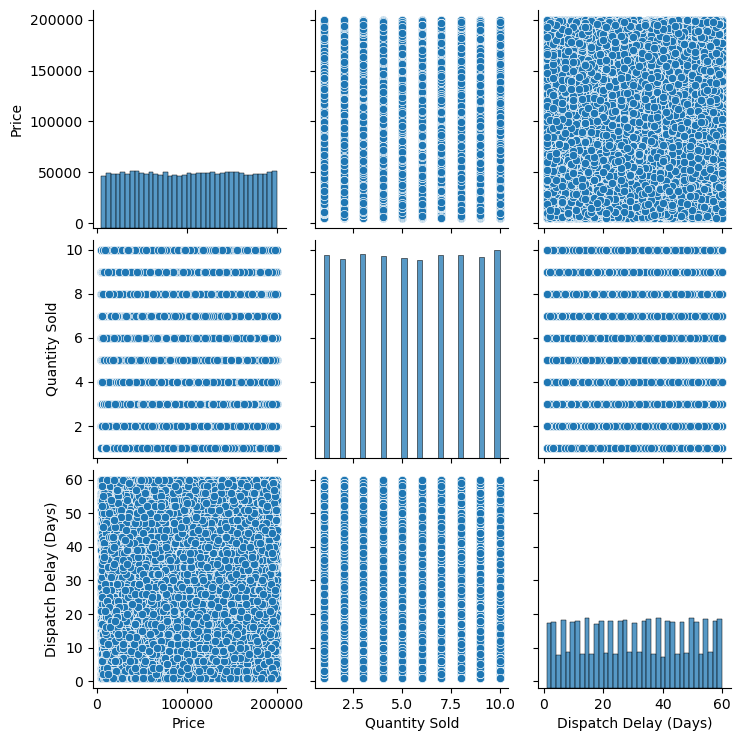

In [15]:
# Pairplot for numerical insights
sns.pairplot(df[['Price', 'Quantity Sold', 'Dispatch Delay (Days)']])
plt.show()


## Hypothesis Testing

In [17]:
from scipy.stats import ttest_ind

# Compare prices between Laptops and Mobile Phones
mobile = df[df['Product'] == 'Mobile Phone']['Price']
laptop = df[df['Product'] == 'Laptop']['Price']

t_stat, p_val = ttest_ind(mobile, laptop, equal_var=False)
print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_val:.4f}")
if p_val < 0.05:
    print("There is a significant difference in prices between Mobile Phones and Laptops.")
else:
    print("No significant price difference between Mobile Phones and Laptops.")


T-Statistic: -0.5685, P-Value: 0.5697
No significant price difference between Mobile Phones and Laptops.


## Document Insights

- **Missing Values** handled using mode and thresholding.
- **Price and Quantity** show logical distributions; higher-priced items are sold in lower quantities.
- **Laptops** appear to have higher average prices than **Mobile Phones** (confirmed by t-test).
- **Dispatch Delay** is a useful engineered feature that could help logistic optimization.
- **Correlation** between price and quantity is low; factors like brand, location, or specs might influence it more.
